In [1]:
%matplotlib inline
import jax
import jax.numpy as jnp
from jax import random, vmap
import matplotlib.pyplot as plt
import numpy as np
from optim_process import optim_process
import screen

### 1 dim input

In [2]:
constrains = {'X': (-1.0, 2.0)}
noise = 0.01 # cannot be too small, or grad would be nan
n_init = 3
dim = 1

# Define your objective function using JAX
def f(X, noise=noise):
    return -jnp.sin(3 * X) - X**2 + 0.7 * X + noise * random.normal(random.PRNGKey(0), X.shape)


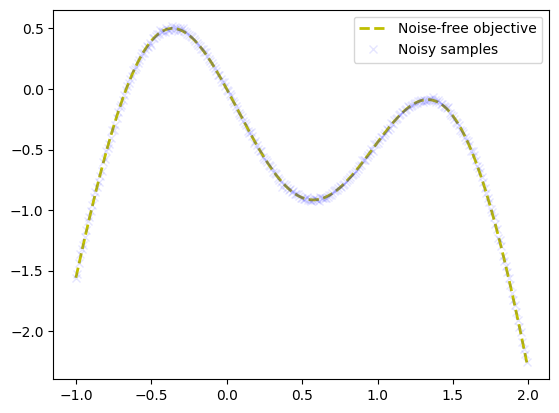

In [3]:
# Dense grid of points within bounds
X = jnp.arange(-1, 2, 0.01).reshape(-1, 1)
# Noise-free objective function values at X 
Y = f(X,0)
# Plot optimization objective with noise level 
plt.plot(X, Y, 'y--', lw=2, label='Noise-free objective')
plt.plot(X, f(X), 'bx', lw=1, alpha=0.1, label='Noisy samples')
# plt.plot(X_init, Y_init, 'kx', mew=3, label='Initial samples')
plt.legend();

optimize!

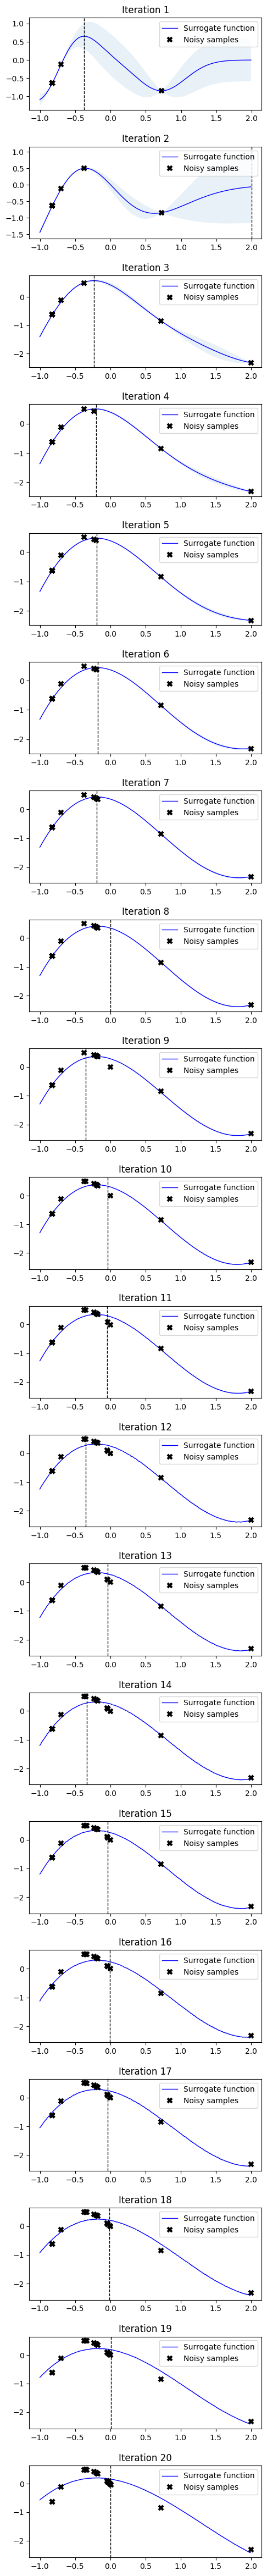

In [4]:
optimizer_params = optim_process(
    f,
    constrains,
    noise,
    n_init = n_init,
    seed = 42,
    dim = dim,
    n = 20,
    num_steps = 40,
    lr = 0.01,
    plot_figure = True)

In [5]:
optimizer_params.target

0.49796101450920105

In [6]:
optimizer_params.params

{'X': Array(-0.35110104, dtype=float32)}

### 2 dim input

In [ ]:
constrains = {'x': (-10, 10), 'y': (0, 10)}
noise = 0.01
n_init = 5 
dim = 2

In [ ]:
def f(x, y):
    return -y ** 2 - (x - y) ** 2 + 3 * x / y - 2 + noise * random.normal(random.PRNGKey(0), x.shape)



In [ ]:
optimizer_params = optim_process(
    f,
    constrains,
    noise,
    n_init = n_init,
    seed = 42,
    dim = dim,
    n = 40,
    num_steps = 40,
    lr = 0.01)

In [ ]:
optimizer_params.target

In [ ]:
optimizer_params.params

In [ ]:
optimizer_params.target_all